# SALES DATA ANALYSIS

# DATA CLEANING

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [3]:
df=pd.read_excel("/kaggle/input/ecommerce/ECOMM DATA.xlsx")

In [4]:
df.shape

(51290, 24)

In [5]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [8]:
pd.isnull(df).sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [9]:
df.drop(['Postal Code'],axis=1,inplace=True)

In [10]:
pd.isnull(df).sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
City              0
State             0
Country           0
Market            0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
dtype: int64

In [11]:
df.describe()

,Row ID,Order Date,Ship Date,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,51290,51290,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,2013-05-11 21:26:49.155781120,2013-05-15 20:42:42.745174528,246.490581,3.476545,0.142908,28.610982,26.375818
min,1.00000,2011-01-01 00:00:00,2011-01-03 00:00:00,0.444000,1.000000,0.000000,-6599.978000,0.002000
25%,12823.25000,2012-06-19 00:00:00,2012-06-23 00:00:00,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,2013-07-08 00:00:00,2013-07-12 00:00:00,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,2014-05-22 00:00:00,2014-05-26 00:00:00,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,2014-12-31 00:00:00,2015-01-07 00:00:00,22638.480000,14.000000,0.850000,8399.976000,933.570000
std,14806.29199,NaN,NaN,487.565361,2.278766,0.212280,174.340972,57.296810


In [12]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Market', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost', 'Order Priority'],
      dtype='object')

# **EXPLORATORY DATA ANALYSIS**

In [17]:
file_path = '/kaggle/input/ecommerce/ECOMM DATA.xlsx'
orders_df = pd.read_excel(file_path, sheet_name='Orders')
returns_df = pd.read_excel(file_path, sheet_name='Returns')
people_df = pd.read_excel(file_path, sheet_name='People')

In [18]:
orders_df['Order Date'] = pd.to_datetime(orders_df['Order Date'])

In [19]:
orders_df = orders_df.merge(returns_df[['Order ID', 'Returned']], on='Order ID', how='left')
orders_df['Returned'] = orders_df['Returned'].fillna('No')

In [20]:
orders_df = orders_df.merge(people_df, left_on='Region', right_on='Region', how='left')

In [21]:
sales_by_category = orders_df.groupby('Category')['Sales'].sum().reset_index()

In [22]:
profit_by_category = orders_df.groupby('Category')['Profit'].sum().reset_index()


In [23]:
sales_by_region = orders_df.groupby('Region')['Sales'].sum().reset_index()

In [24]:
return_rates = returns_df.groupby('Market')['Returned'].count().reset_index()
return_rates.columns = ['Market', 'Return Count']
total_orders_by_market = orders_df.groupby('Market')['Order ID'].count().reset_index()
total_orders_by_market.columns = ['Market', 'Total Orders']
return_rates = return_rates.merge(total_orders_by_market, on='Market')
return_rates['Return Rate'] = return_rates['Return Count'] / return_rates['Total Orders']

In [25]:
sales_trends = orders_df.groupby('Order Date')['Sales'].sum().reset_index()

# VISUALIZATION

# Total Sales by Category

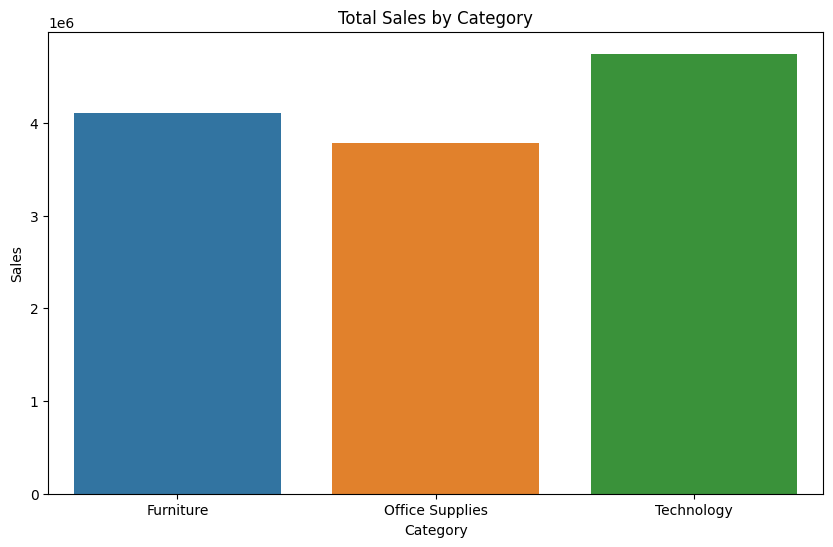

In [26]:
plt.figure(figsize=(10, 6))
sns.barplot(data=sales_by_category, x='Category', y='Sales')
plt.title('Total Sales by Category')
plt.show()

# Total Profit by Category


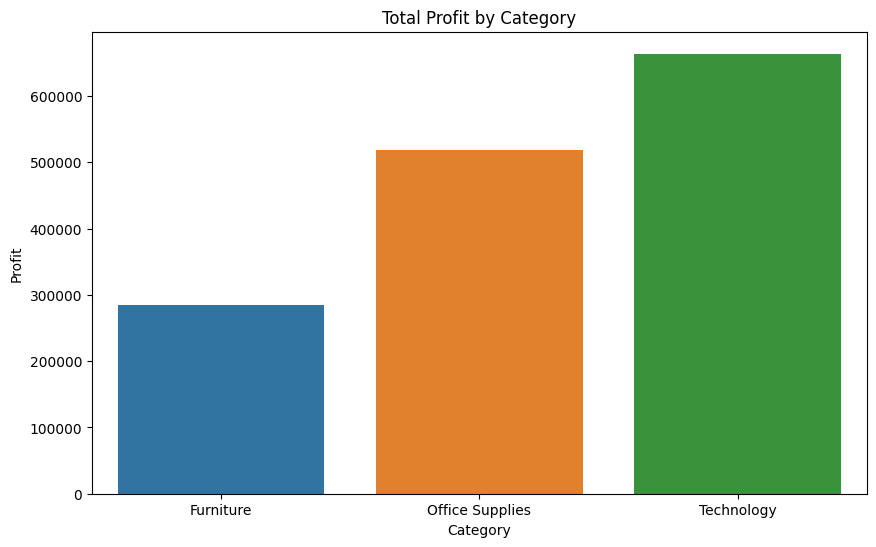

In [27]:
plt.figure(figsize=(10, 6))
sns.barplot(data=profit_by_category, x='Category', y='Profit')
plt.title('Total Profit by Category')
plt.show()

# Sales Distribution by Region

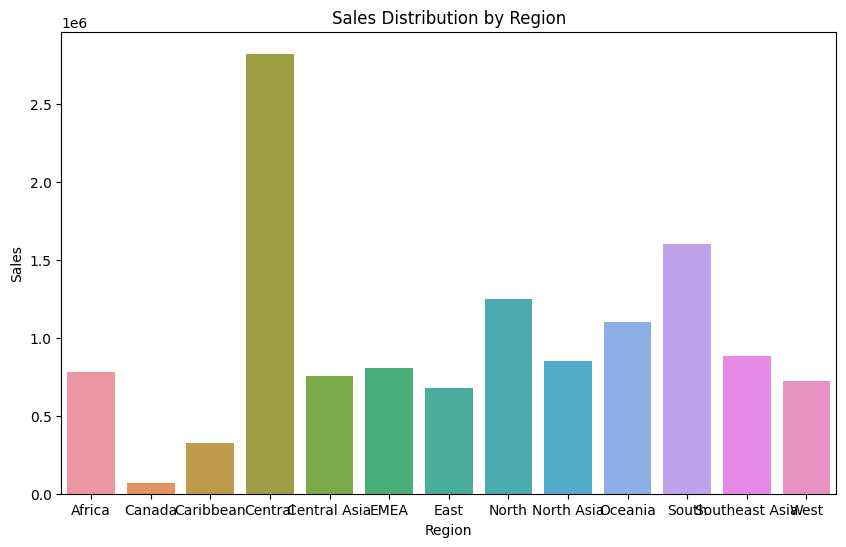

In [28]:
plt.figure(figsize=(10, 6))
sns.barplot(data=sales_by_region, x='Region', y='Sales')
plt.title('Sales Distribution by Region')
plt.show()

# Return Rates by Market

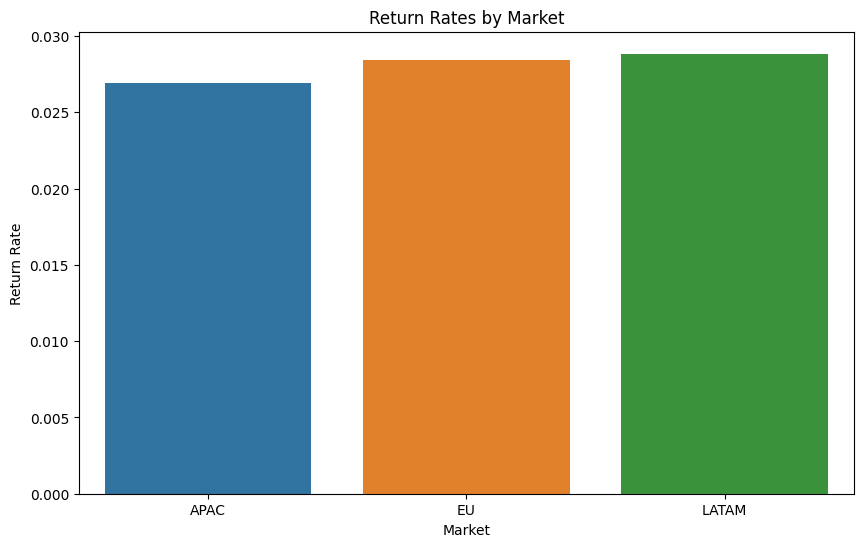

In [29]:
plt.figure(figsize=(10, 6))
sns.barplot(data=return_rates, x='Market', y='Return Rate')
plt.title('Return Rates by Market')
plt.show()

# Sales Trends Over Time

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


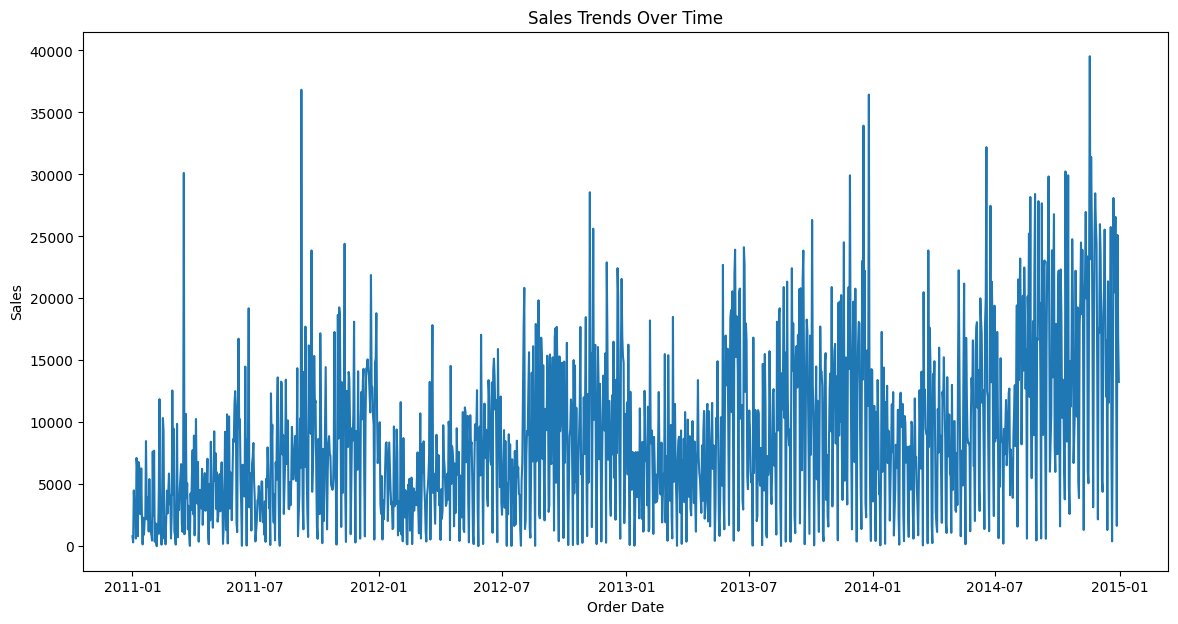

In [30]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=sales_trends, x='Order Date', y='Sales')
plt.title('Sales Trends Over Time')
plt.show()

# LIVE DATA

In [32]:
orders_df = pd.read_excel(file_path, sheet_name='Orders')
returns_df = pd.read_excel(file_path, sheet_name='Returns')
people_df = pd.read_excel(file_path, sheet_name='People')

In [33]:
orders_df['Order Date'] = pd.to_datetime(orders_df['Order Date'])
orders_df = orders_df.merge(returns_df[['Order ID', 'Returned']], on='Order ID', how='left')
orders_df['Returned'] = orders_df['Returned'].fillna('No')
orders_df = orders_df.merge(people_df, left_on='Region', right_on='Region', how='left')

In [34]:
sales_trends = orders_df.groupby('Order Date')['Sales'].sum().reset_index()

In [36]:
fig = px.line(sales_trends, x='Order Date', y='Sales', title='Sales Trends Over Time')
fig.show()